In [ ]:
import pandas as pd
import seaborn as sns

df_bb = pd.read_csv('/content/imdb_barbie_Uncleaned.csv', header=None)
df_op = pd.read_csv('/content/imdb_oppenhimmer_Uncleaned.csv', header=None)
df_bb.drop_duplicates(inplace=True)
df_op.drop_duplicates(inplace=True)

# Regular Expression

In [ ]:
import re

score_Reg = '(\d{1,2})\/\d{1,2}\s.*\s'
title_Reg = '\d{1,2}\/\d{1,2}\s(.*)'
people_found_helpful_Reg = '([\d,]*) out of ([\d,]*) found this helpful'
username_Reg = '\d{1,2}\/\d{1,2}\s.*\s([A-Za-z0-9_-]+)\d{2}\s[January|February|March|April|June|July|August|September|October|November|December]'
date_Reg = '(\d{1,2}\s\w+\s\d{4})'
review_Reg = '\d{1,2}\s\w+\s\d{4}\s([\s\S]*)\s[\d,]* out of [\d,]* found this helpful'

In [ ]:
# Clean every row in data set

# cleand_df_bb = pd.DataFrame(columns=['score', 'title', 'username', 'date', 'people_found_helpful', 'people_didnt_find_helpful', 'review'])

def get_cleaned_df(dirty_df):
	cleaned_df = pd.DataFrame(columns=['score', 'title', 'username', 'date', 'people_found_helpful', 'review'])
    # cleaned_df = pd.DataFrame(columns=['score', 'title', 'username', 'date', 'people_found_helpful', 'people_didnt_find_helpful', 'review'])
	for index in range(len(dirty_df)):
		row = dirty_df.iloc[index][0]

		score = re.findall(score_Reg, row)
		title = re.findall(title_Reg, row)
		username = re.findall(username_Reg, row)
		date = re.findall(date_Reg, row)
		people_found_helpful = re.findall(people_found_helpful_Reg, row)
		review = re.findall(review_Reg, row)

		if not score:
			score = ['NULL']
		if not title:
			title = ['NULL']
		if not username:
			username = ['NULL']
		if not date:
			date = ['NULL']
		if not people_found_helpful:
			people_found_helpful = ['NULL', 'NULL']
		if not review:
			review = ['NULL']

		cleaned_df.loc[index] = [score[0], title[0], username[0], date[0], people_found_helpful[0], review[0]]
	return cleaned_df

In [ ]:
clean_df_bb = get_cleaned_df(df_bb)
clean_df_bb.drop_duplicates(subset=['username'], inplace=True)

In [ ]:
clean_df_bb

,score,title,username,date,people_found_helpful,review
0,6,Creative but preachy and confusing,Imshortok06,23 July 2023,"(1,007, 1,363)",I'm just going to get straight to the point: I...
1,6,"Beautiful film, but so preachy",LoveofLegacy,21 July 2023,"(1,190, 1,646)","Margot does the best with what she's given, bu..."
2,6,Clever and fun beginning turns into another le...,Binkconn,21 July 2023,"(804, 1,173)","Barbie begins in an irresistible way, as a fun..."
3,8,It was depressing,coxaneesa,24 July 2023,"(152, 242)",Warning: Spoilers
4,9,A Technicolor Dream,heatherhilgers,24 July 2023,"(20, 26)","Wow, this movie was a love letter to cinema. F..."
...,...,...,...,...,...,...
792,2,Barbie-not good,thongman,22 July 2023,"(5, 17)",The only reason this movie even gets a 2 from ...
793,5,Feminism but the rest?,iyaseminkose,23 July 2023,"(1, 6)","I'm NOT a Barbie girl in NOT the Barbie World,..."
794,3,"Great sets, great execution but horrible story...",DaHermitKid,28 July 2023,"(1, 5)","Firstly, the technical execution is top notch...."
795,2,Just meh.,apriljosey-29034,27 July 2023,"(0, 1)",Warning: Spoilers


In [ ]:
clean_df_op = get_cleaned_df(df_op)
clean_df_op.drop_duplicates(subset=['username'], inplace=True)

In [ ]:
clean_df_op

,score,title,username,date,people_found_helpful,review
0,9,Murphy is exceptional,Orlando_Gardner,19 July 2023,"(1,413, 1,597)",You'll have to have your wits about you and yo...
1,8,"A challenging watch to be sure, but a worthwhi...",Jeremy_Urquhart,20 July 2023,"(685, 819)",One of the most anticipated films of the year ...
2,10,A brilliantly layered examination of a man thr...,MrDHWong,20 July 2023,"(556, 691)","""Oppenheimer"" is a biographical thriller film ..."
3,10,Nolan delivers a powerfull biopic that shows t...,and_mikkelsen,20 July 2023,"(358, 457)",This movie is just... wow! I don't think I hav...
4,10,A Masterpiece,mohameddawoud-26019,19 July 2023,"(670, 833)",I may consider myself lucky to be alive to wat...
...,...,...,...,...,...,...
2031,7,"Huge story, but production fails sometimes",andreverschoor,27 July 2023,"(1, 3)","Loved the movie, loved the actors efforts. Aft..."
2032,6,Tweaked,fmacr,25 July 2023,"(1, 7)","I suppose these reviews are tweaked, otherwise..."
2033,6,Just a 6 for a near perfect film.,m-nicolaou-86-661254,24 July 2023,"(0, 1)",Ok let me start by the obvious ratings which w...
2034,6,No need to be 3 hours,scottahaynie,24 July 2023,"(0, 0)",Acting was tremendous and the true story behin...


<ipython-input-137-5ec7be25a984>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_op['date'] = pd.to_datetime(clean_df_op['date'], format='%d %B %Y')
<ipython-input-137-5ec7be25a984>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_op['date_difference'] = (release_date - clean_df_op['date']).dt.days
<ipython-input-137-5ec7be25a984>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

<Axes: xlabel='movie_id', ylabel='date_difference'>

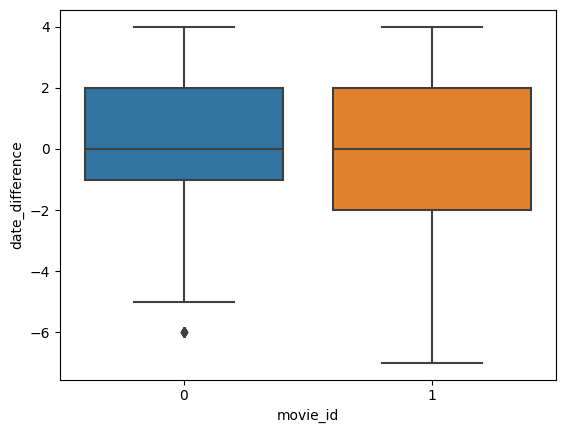

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# clean_df_op = clean_df_op[~clean_df_op['date'].str.contains('IMAX')]

release_date = pd.to_datetime('2023-07-23')

clean_df_op['date'] = pd.to_datetime(clean_df_op['date'], format='%d %B %Y')
clean_df_op['date_difference'] = (release_date - clean_df_op['date']).dt.days

clean_df_bb['date'] = pd.to_datetime(clean_df_bb['date'], format='%d %B %Y')
clean_df_bb['date_difference'] = (release_date - clean_df_bb['date']).dt.days

clean_df_bb['movie_id'] = 0
clean_df_op['movie_id'] = 1
df = pd.concat([clean_df_op, clean_df_bb])

sns.boxplot(data=df, x='movie_id', y='date_difference')

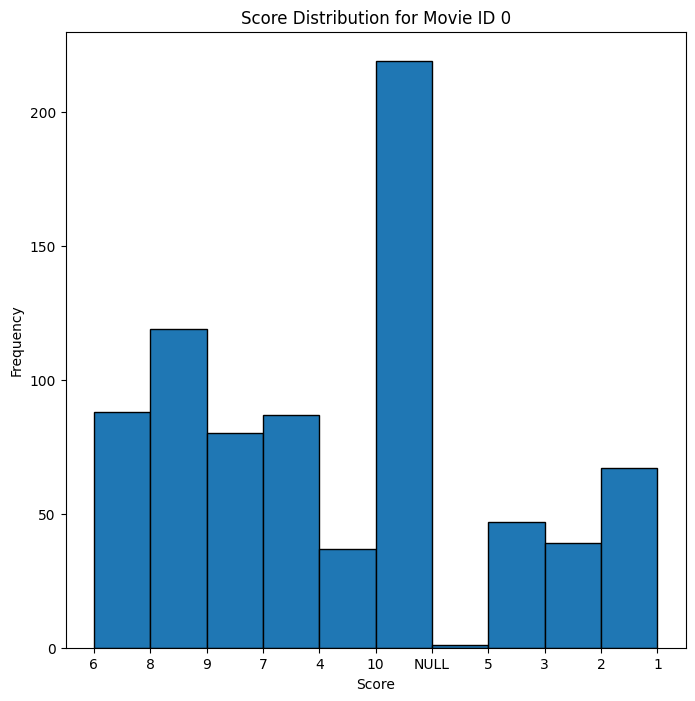

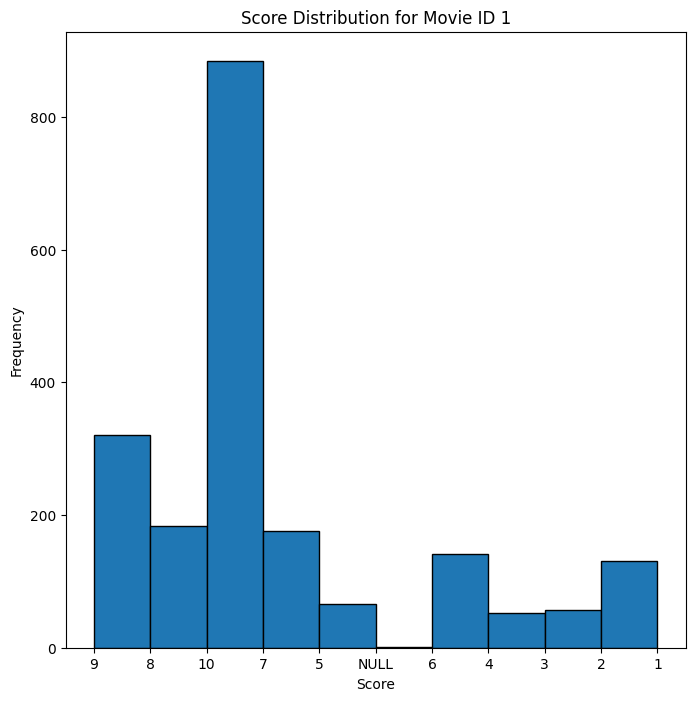

In [155]:
group_by = df.groupby('movie_id')
for movie_id, group_data in group_by:
    plt.figure(figsize=(8, 8))
    plt.hist(group_data['score'], edgecolor='black')
    plt.title(f'Score Distribution for Movie ID {movie_id}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()